<h2 style="text-align: center;background-color:#181D31;color:white;padding:20px">porject make model for part-of-speech</h2> 

<p>introduction about POS</p>
in grammar, a part of speech or part-of-speech (abbreviated as POS or PoS, also known as word class or grammatical category) is a category of words (or, more generally, of lexical items) that have similar grammatical properties. Words that are assigned to the same part of speech generally display similar syntactic behavior (they play similar roles within the grammatical structure of sentences), sometimes similar morphological behavior in that they undergo inflection for similar properties and even similar semantic behavior. Commonly listed English parts of speech are noun, verb, adjective, adverb, pronoun, preposition, conjunction, interjection, numeral, article, and determiner.

<h3 style="background-color:#263159;color:white;padding:20px">Steps :-</h3>

<ol>
    <li>import necessary libs</li>
    <li>load dataset for nltk</li>
    <li>Preprocess data</li>
    <li>convert sentences to numbers</li>
    <li>word embedding</li>
    <li>make model by Lstm</li>
    <li>evaluate model</li>
</ol>

## load libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM,GRU,TimeDistributed,Embedding,Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
import nltk
from nltk.corpus import brown,treebank

### load dataset

In [3]:
brown_data=brown.tagged_sents(tagset="universal")
treebank_data=treebank.tagged_sents(tagset="universal")
data=brown_data+treebank_data

In [4]:
data[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [5]:
len(data)

61254

### preprocess data

In [6]:
X,y=[],[]

for i in data:
    X_sentence,y_sentence=[],[]
    for j in i:
        X_sentence.append(j[0])
        y_sentence.append(j[1])
    X.append(X_sentence)
    y.append(y_sentence)

In [7]:
len(X),len(y)

(61254, 61254)

In [8]:
print("First sentence :- ")
print(X[0])

print("First sentence in Part-of-speech :- ")
print(y[0])

First sentence :- 
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
First sentence in Part-of-speech :- 
['DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', '.', 'DET', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'VERB', 'NOUN', '.']


### convert words to number

In [9]:
tokenize_X=Tokenizer()
tokenize_X.fit_on_texts(X)

In [12]:
vocab_size=len(tokenize_X.word_index)
vocab_size

53232

In [13]:
import pickle
import os

In [32]:
os.chdir("F:\\Data Science\\NLP\\Pos&Ner")

In [33]:
# save word dictionary in binary file by pickle
if os.path.exists("binary_information") == False:
    os.mkdir("binary_information")

In [34]:
pickle.dump(tokenize_X.word_index,open("binary_information/word.pickle","wb"))

In [35]:
encoded_X=tokenize_X.texts_to_sequences(X)

In [37]:
print(encoded_X[0])

[1, 5594, 715, 2437, 1748, 52, 1967, 35, 2203, 4, 15037, 428, 1201, 1527, 1202, 14, 60, 487, 15, 9, 83, 9782, 226, 181, 3]


In [38]:
tokenizer_y=Tokenizer()
tokenizer_y.fit_on_texts(y)

In [39]:
encoded_y=tokenizer_y.texts_to_sequences(y)

In [40]:
encoded_y[0]

[5, 1, 1, 6, 1, 2, 1, 5, 1, 4, 1, 6, 1, 1, 2, 3, 5, 1, 3, 4, 5, 1, 2, 1, 3]

In [41]:
tokenizer_y.word_index

{'noun': 1,
 'verb': 2,
 '.': 3,
 'adp': 4,
 'det': 5,
 'adj': 6,
 'adv': 7,
 'pron': 8,
 'conj': 9,
 'prt': 10,
 'num': 11,
 'x': 12}

In [43]:
pickle.dump(tokenizer_y.word_index,open("binary_information/classes.pickle","wb"))

In [44]:
# max legth of X
max_length=max([len(x) for x in encoded_X])
max_length

271

(array([4.5912e+04, 1.4145e+04, 1.0870e+03, 8.2000e+01, 1.6000e+01,
        9.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.,  28.,  55.,  82., 109., 136., 163., 190., 217., 244., 271.]),
 <a list of 10 Patch objects>)

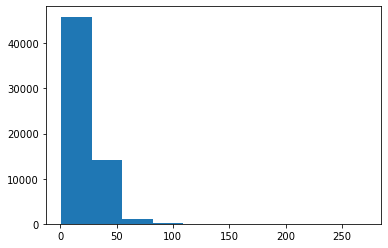

In [45]:
plt.hist([len(x) for x in encoded_X])

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


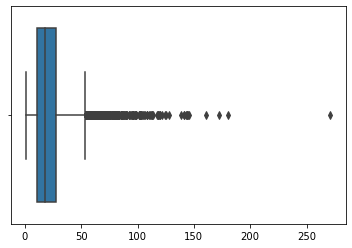

In [47]:
import seaborn as sns
sns.boxplot([len(x) for x in encoded_X])

we show 271 is very large number , and most sentences length not exceed 100 , then we will make truncate from text and then make encoder for encoded_x,encoded_y

In [48]:
max_length=100
padded_x=pad_sequences(encoded_X,maxlen=max_length)
padded_y=pad_sequences(encoded_y,maxlen=max_length)

In [49]:
padded_x[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,  5594,   715,  2437,  1748,    52,
        1967,    35,  2203,     4, 15037,   428,  1201,  1527,  1202,
          14,    60,   487,    15,     9,    83,  9782,   226,   181,
           3])

In [50]:
padded_y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 1, 6, 1, 2, 1, 5, 1, 4, 1, 6, 1,
       1, 2, 3, 5, 1, 3, 4, 5, 1, 2, 1, 3])

In [51]:
X=np.array(padded_x)
X.shape

(61254, 100)

In [52]:
y=to_categorical(padded_y)
y.shape

(61254, 100, 13)

In [53]:
y[0]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### run model with training word embedding

In [56]:
model=Sequential()
model.add(Embedding(
    vocab_size,
    300,
    input_length=X.shape[1],
    trainable=True
))

model.add(LSTM(
    256,
    return_sequences=True # True - return whole sequence; False - return single output of the end of the sequence
))

model.add(TimeDistributed(Dense(y.shape[2],activation="softmax")))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          15969600  
                                                                 
 lstm_1 (LSTM)               (None, 100, 256)          570368    
                                                                 
 time_distributed (TimeDistr  (None, 100, 13)          3341      
 ibuted)                                                         
                                                                 
Total params: 16,543,309
Trainable params: 16,543,309
Non-trainable params: 0
_________________________________________________________________


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
print("train size :- ")
print(X_train.shape,y_train.shape)

print("test size :- ")
print(X_test.shape,y_test.shape)

train size :- 
(49003, 100) (49003, 100, 13)
test size :- 
(12251, 100) (12251, 100, 13)


In [65]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [67]:
model.fit(X_train,y_train,batch_size=256,validation_split=0.2,epochs=1,verbose=2)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/embedding_1/embedding_lookup' defined at (most recent call last):
    File "D:\Anaconda\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "D:\Anaconda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
      app.start()
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "D:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "D:\Anaconda\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "D:\Anaconda\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Anaconda\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "D:\Anaconda\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "D:\Anaconda\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "D:\Anaconda\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "D:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "D:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "D:\Anaconda\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "D:\Anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "D:\Anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2866, in run_cell
      result = self._run_cell(
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
      return runner(coro)
    File "D:\Anaconda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3071, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-66-79217e54cbe5>", line 1, in <module>
      model.fit(X_train,y_train,batch_size=256,validation_split=0.2,epochs=1)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "D:\Anaconda\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "D:\Anaconda\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1/embedding_1/embedding_lookup'
indices[112,91] = 53232 is not in [0, 53232)
	 [[{{node sequential_1/embedding_1/embedding_lookup}}]] [Op:__inference_train_function_4206]